# Data Exploration and Mining of a Customer Accounts Recievable from the IBM Public Sample DataSet
Late payments can cause havoc on a company's cashflows. A model to predict wether a customer would be late on a payment can generate insights on wether to extend credit to that customer. It can also help a company priortize production/delivery of products to customers who will pay on time. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Load the Data Set and Sort by Date

In [18]:
df_original = pd.read_csv("WA_Fn-UseC_-Accounts-Receivable (1).csv")
df_original['InvoiceDate']= pd.to_datetime(df_original.InvoiceDate)
df_dropped =df_original.sort_values(by=['InvoiceDate'])
print(df_dropped.head())
print(len(df_dropped))

      countryCode  customerID PaperlessDate  invoiceNumber InvoiceDate  \
1279          391  6708-DPYTF      8/2/2012     5133177585  2012-01-03   
75            770  3993-QUNVJ    12/31/2012      280670965  2012-01-03   
1584          406  5164-VMYWJ    11/27/2013     6393629835  2012-01-03   
1460          818  1604-LIFKX     3/16/2013     5928070131  2012-01-03   
1494          818  8887-NCUZC     1/22/2013     6050714721  2012-01-03   

       DueDate  InvoiceAmount Disputed SettledDate PaperlessBill  \
1279  2/2/2012          55.37       No   2/16/2012         Paper   
75    2/2/2012          50.39       No   1/23/2012         Paper   
1584  2/2/2012          71.33       No   1/30/2012         Paper   
1460  2/2/2012          97.60       No   2/25/2012         Paper   
1494  2/2/2012          15.99      Yes   2/15/2012         Paper   

      DaysToSettle  DaysLate  
1279            44        14  
75              20         0  
1584            27         0  
1460            53    

In [19]:
#generate the late dependent variable
df_dropped['Late'] = df_dropped['DaysLate'].apply(lambda x: 1 if x >0 else 0)

In [20]:
# generate a rolling count of the amount of late payments for each customer
df_dropped['countlate']=df_dropped.Late.eq(1).groupby(df_dropped.customerID).apply(lambda x : x.cumsum().shift().fillna(0)).astype(int)


## Initial Exploration of the Dataset

#### Database Structure and Analysis
    

In [21]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 1279 to 2046
Data columns (total 14 columns):
countryCode      2466 non-null int64
customerID       2466 non-null object
PaperlessDate    2466 non-null object
invoiceNumber    2466 non-null int64
InvoiceDate      2466 non-null datetime64[ns]
DueDate          2466 non-null object
InvoiceAmount    2466 non-null float64
Disputed         2466 non-null object
SettledDate      2466 non-null object
PaperlessBill    2466 non-null object
DaysToSettle     2466 non-null int64
DaysLate         2466 non-null int64
Late             2466 non-null int64
countlate        2466 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(6)
memory usage: 359.4+ KB


In [22]:
df_dropped.describe(include=np.object)


,customerID,PaperlessDate,DueDate,Disputed,SettledDate,PaperlessBill
count,2466,2466,2466,2466,2466,2466
unique,100,91,681,2,695,2
top,9149-MATVB,9/11/2012,1/29/2013,No,4/28/2013,Paper
freq,36,58,10,1905,10,1263


In [23]:
print(pd.crosstab(index=df_dropped["Disputed"], columns="count"))
print(pd.crosstab(index=df_dropped["customerID"], columns = "count"))
print(pd.crosstab(index=df_dropped["countryCode"], columns="count"))
print(pd.crosstab(index=df_dropped["Late"], columns="count"))


col_0     count
Disputed       
No         1905
Yes         561
col_0       count
customerID       
0187-ERLSR     16
0379-NEVHP     27
0465-DTULQ     26
0625-TNJFG     28
0688-XNJRO     34
0706-NRGUP     18
0709-LZRJV     25
0783-PEPYR     21
1080-NDGAE     31
1168-BEASA     23
1408-OQZUE     23
1447-YZKCL     23
1604-LIFKX     20
2026-XLBER     21
2125-HJDLA     21
2423-QOKIO     21
2447-JCFGW     23
2621-XCLEH     15
2676-DZINU     26
2687-XWAMA     28
2820-XGXSB     24
2824-HJQPP     30
3271-HYHDN     18
3271-YDPUJ     19
3448-OWJOT     28
3568-JJMFW     28
3569-VJWXS     24
3598-DNURW     20
3676-CQAIF     17
3831-FXWYK     26
...           ...
7841-HROAQ     22
7856-ODQFO     28
7938-EVASK     21
7946-HJDUR     30
8102-ABPKQ     27
8156-PCYBM     31
8364-UWVLM     21
8389-TCXFQ     33
8690-EEBEO     31
8820-BLYDZ     24
8887-NCUZC     35
8942-ERSWK     30
8976-AMJEO     27
9014-WENVB     22
9117-LYRCE     23
9149-MATVB     36
9174-IYKOC     29
9181-HEKGV     23
9212-BTDMX     28


Which Customer is always late?

In [180]:
customer_latecount =pd.crosstab(index=df_dropped["customerID"], columns=df_dropped['Late'])
customer_latecount.sort_values(by=[1], ascending = False)

Late,0,1
customerID,,
5,2,32
75,1,26
79,5,26
57,5,25
33,3,25
25,5,23
62,1,23
99,8,23
81,13,22


### Generate some more feature

In [24]:
df_dropped['Disputed'] = df_dropped['Disputed'].map({'No':0,'Yes':1})
df_dropped['PaperlessBill'] = df_dropped['PaperlessBill'].map({'Paper': 0,'Electronic': 1})


In [25]:
df_dropped['InvoiceQuarter']= pd.to_datetime(df_dropped['InvoiceDate']).dt.quarter
df_dropped['SettleTime'] = pd.to_datetime(df_dropped['SettledDate'])- pd.to_datetime(df_dropped['InvoiceDate'])


## How many payments are late by other variables?

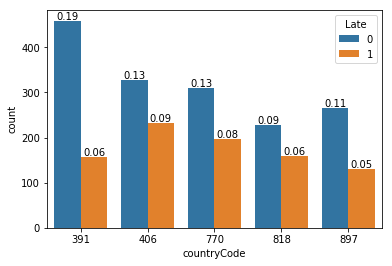

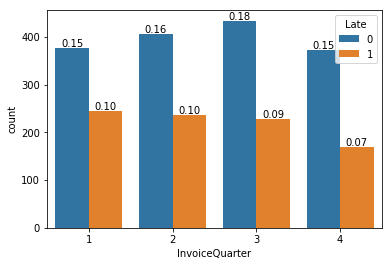

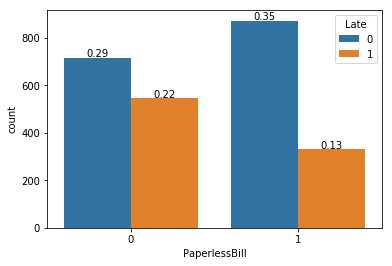

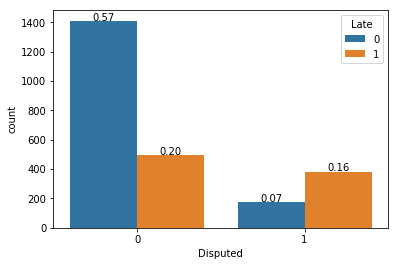

In [27]:
plt.figure(1)
ax = sns.countplot(df_dropped['countryCode'],hue=df_dropped['Late'])
total = float(len(df_dropped['countryCode']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.figure(2)
ax = sns.countplot(df_dropped['InvoiceQuarter'],hue=df_dropped['Late'])
total = float(len(df_dropped['InvoiceQuarter']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.figure(3)
ax = sns.countplot(df_dropped['PaperlessBill'],hue= df_dropped['Late'])
total = float(len(df_dropped['PaperlessBill']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.figure(4)
ax= sns.countplot(df_dropped['Disputed'],hue=df_dropped['Late'])
total = float(len(df_dropped['Disputed']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")


Distributions of Invoice Amounts and Days to settle

C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


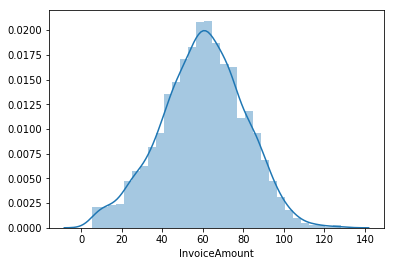

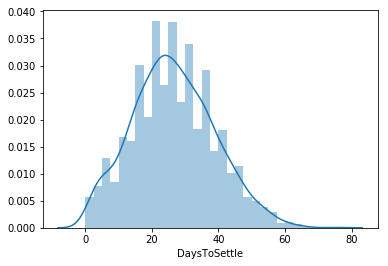

In [28]:
plt.figure(1)
sns.distplot(df_original['InvoiceAmount'])
plt.figure(2)
sns.distplot(df_original['DaysToSettle'])

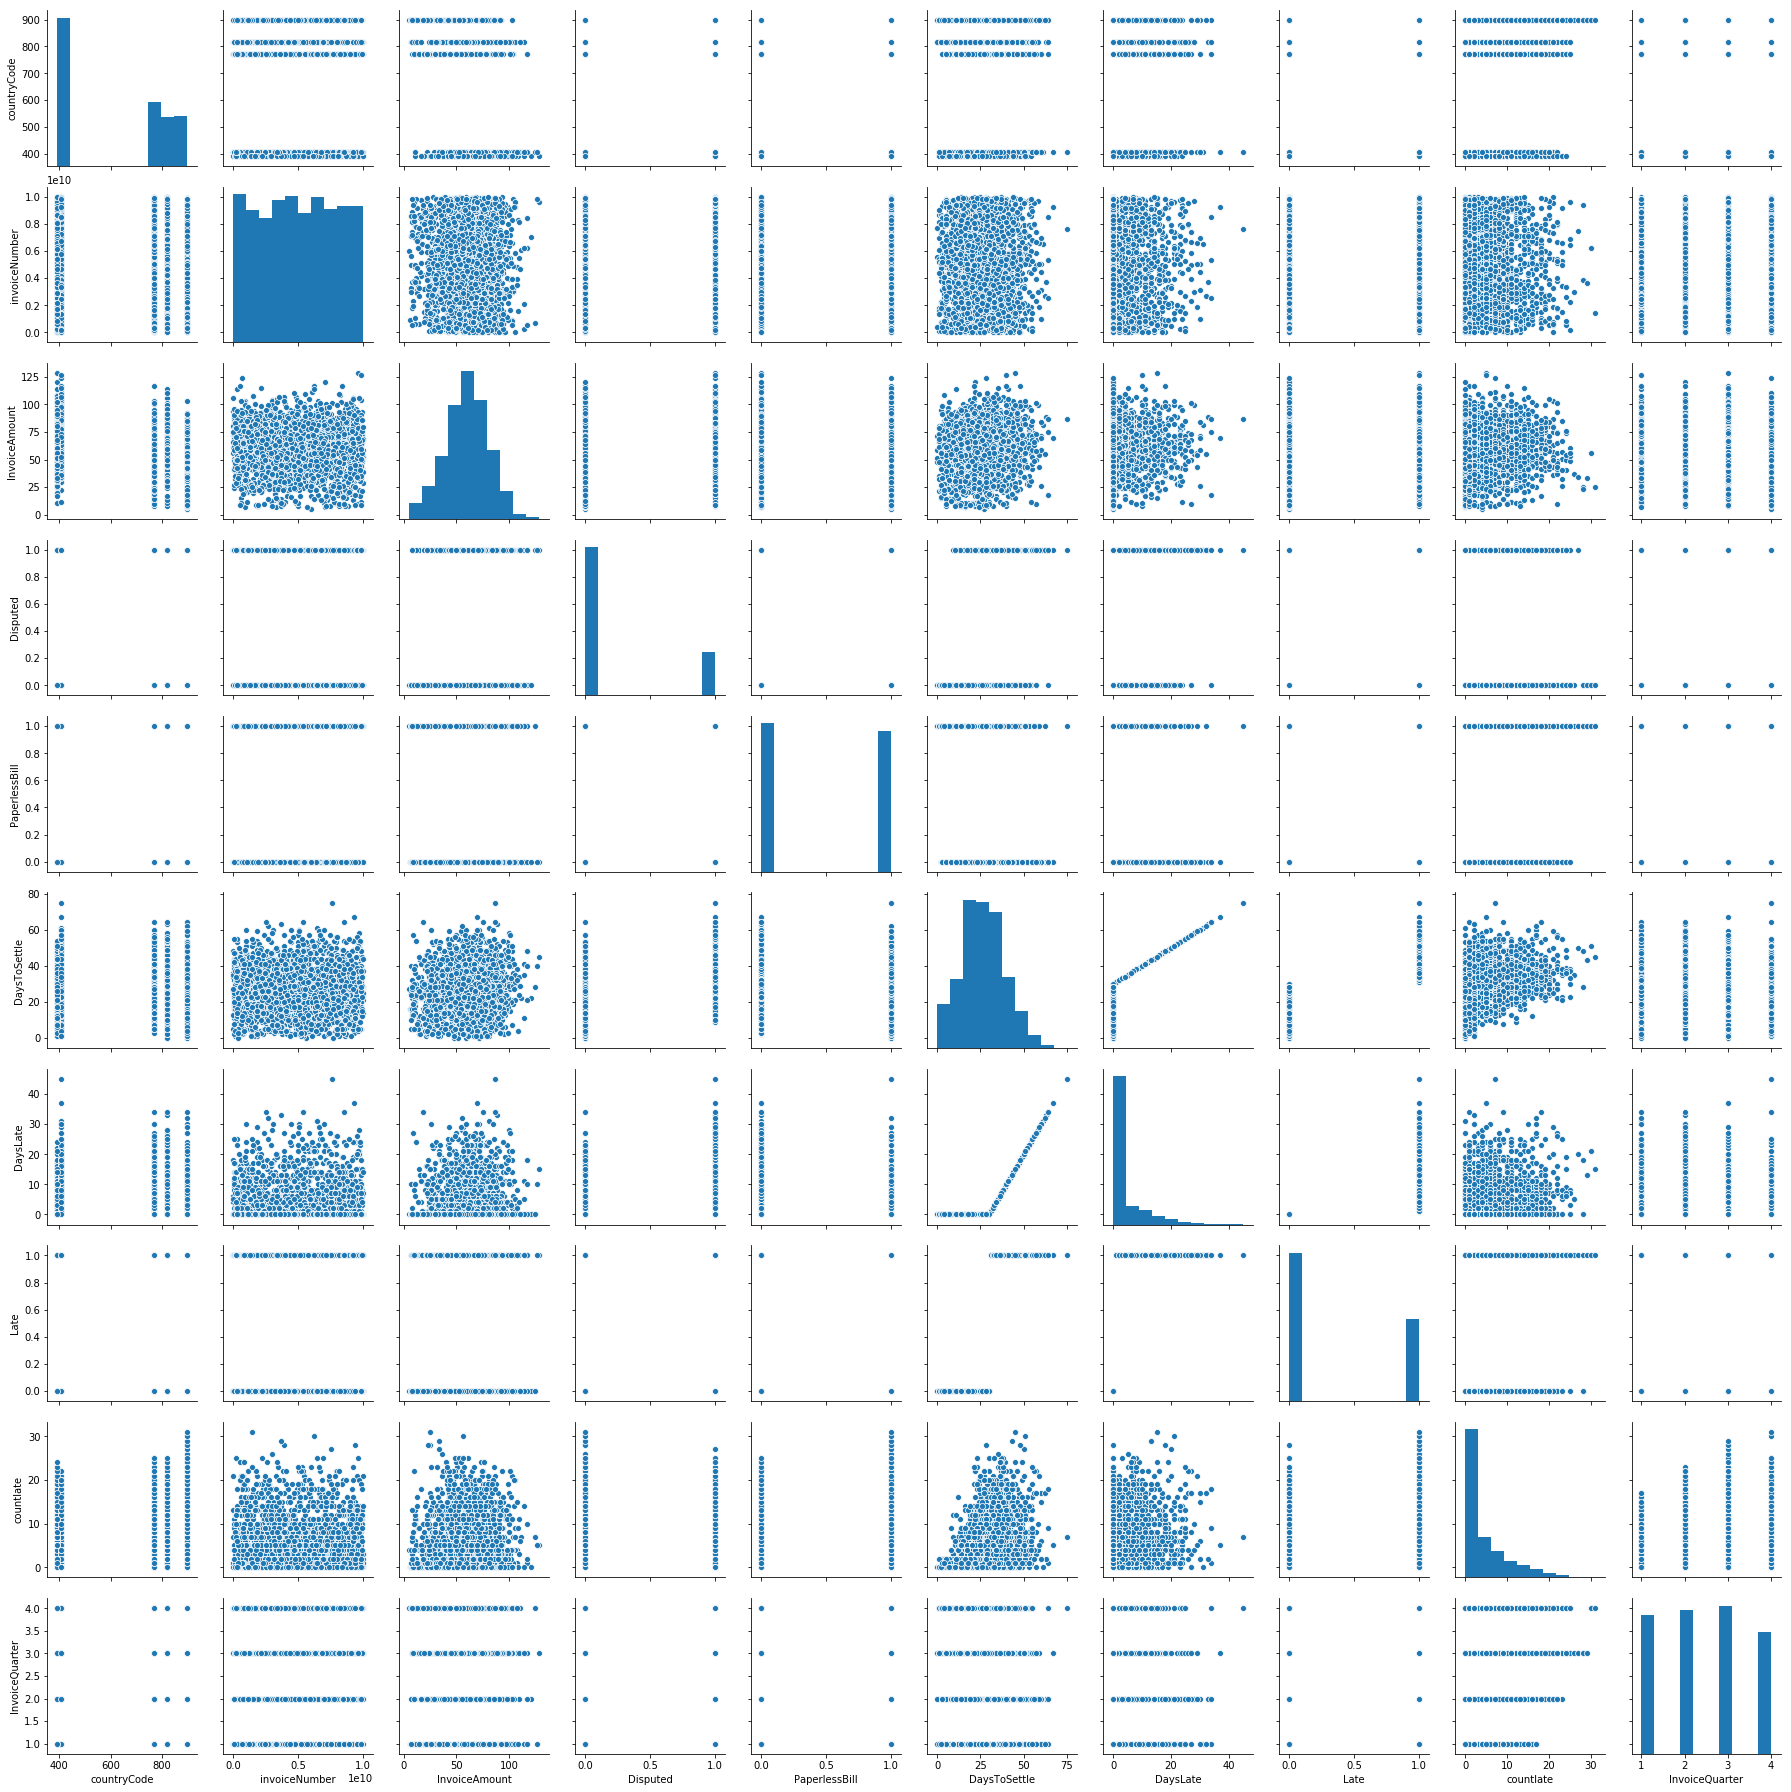

In [29]:
sns.pairplot(df_dropped)

Label Customers with Integers for processing in models

In [30]:
labels = df_dropped['customerID'].astype('category').cat.categories.tolist()
replace_map_comp = {'customerID' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
#replace the customerID with Integers
df_dropped.replace(replace_map_comp, inplace=True)

## Train a Model to Predict if a Payment will be late


###                   Feature Selection

In [153]:
from woe_iv import *


In [170]:
features = ['countryCode',"InvoiceAmount","PaperlessBill",'InvoiceQuarter','customerID','Late','countlate']
df1 = df_dropped[features]


In [155]:
final_iv, IV = data_vars(df1 , df1['Late'])

In [156]:
final_iv.sort_values(by=['IV'], ascending = False)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
11,countlate,0.00,1.00,1013,158,0.155972,855,0.844028,0.180160,0.538074,-1.094153,0.819416
12,countlate,2.00,5.00,690,236,0.342029,454,0.657971,0.269099,0.285714,-0.059912,0.819416
13,countlate,6.00,31.00,763,483,0.633028,280,0.366972,0.550741,0.176211,1.139580,0.819416
4,PaperlessBill,0.00,0.00,1263,546,0.432304,717,0.567696,0.622577,0.451227,0.321896,0.119296
5,PaperlessBill,1.00,1.00,1203,331,0.275145,872,0.724855,0.377423,0.548773,-0.374318,0.119296
6,InvoiceQuarter,1.00,2.00,1264,481,0.380538,783,0.619462,0.548461,0.492763,0.107088,0.014792
7,InvoiceQuarter,3.00,3.00,661,227,0.343419,434,0.656581,0.258837,0.273128,-0.053741,0.014792
8,InvoiceQuarter,4.00,4.00,541,169,0.312384,372,0.687616,0.192702,0.234110,-0.194642,0.014792
2,InvoiceAmount,5.26,60.55,1233,419,0.339822,814,0.660178,0.477765,0.512272,-0.069736,0.004765
3,InvoiceAmount,60.57,128.28,1233,458,0.371452,775,0.628548,0.522235,0.487728,0.068359,0.004765


## Training Models and Evaluating

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, classification_report
knn= KNeighborsClassifier(n_neighbors=5)
lg = LogisticRegression(solver = 'liblinear')
lr = LinearRegression

In [158]:

X = df_dropped[features]
y = df_dropped['Late']

In [166]:
X_train,X_test,y_Train,y_test = train_test_split(X,y,random_state=0)

In [167]:
model1 = lg.fit(X_train,y_Train)
prediction = lg.predict(X_test)
model2 = knn.fit(X_train,y_Train)
prediction2 = model2.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test,prediction))
print("K Nearest Neighbor")
print(classification_report(y_test,prediction2))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       230

   micro avg       1.00      1.00      1.00       617
   macro avg       1.00      1.00      1.00       617
weighted avg       1.00      1.00      1.00       617

K Nearest Neighbor
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       387
           1       0.67      0.53      0.59       230

   micro avg       0.73      0.73      0.73       617
   macro avg       0.71      0.69      0.70       617
weighted avg       0.72      0.73      0.72       617



In [161]:
print(confusion_matrix(y_test,prediction))
print(confusion_matrix(y_test,prediction2))
knn.score(X_test,y_test)



[[387   0]
 [  0 230]]
[[328  59]
 [108 122]]


0.7293354943273906

Test the Generalization of the Model

In [164]:
scores = []
from sklearn.model_selection import KFold
N_FOLDS = 10
kf = KFold(n_splits= N_FOLDS, shuffle = False, random_state = 0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = KNeighborsClassifier()
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
    
print("Mean:", np.mean(scores))
print("STEV:", np.std(scores))

Mean: 0.7336229880517429
STEV: 0.04462697603168


In [165]:
N_FOLDS = 10
kf = KFold(n_splits= N_FOLDS, shuffle = False, random_state = 0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = LogisticRegression(solver = 'liblinear')
    clf.fit(X_train,y_train)
    scorecoef_dict = {}
for coef, feat in zip(model1.coef_,features):
    coef_dict[feat] = coef
    
print(coef_dict)s.append(clf.score(X_test,y_test))
    
print("Mean:", np.mean(scores))
print("STEV:", np.std(scores))

Mean: 0.8668114940258714
STEV: 0.13687571595606923


Report the variables to be used in the model for Billing/Accounting to Use

In [179]:
coef_dict = {}
for coef, feat in zip(model1.coef_,features):
    coef_dict[feat] = coef
    
print(coef_dict)

{'countryCode': array([-2.01269893e-03, -1.85739834e-02, -7.84549793e-01, -3.45685827e-01,
       -6.85315870e-03,  8.83531967e+00,  1.14582003e-01])}
